In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import mpld3

In [ ]:
def info(df, head=True):
    print("Type: ", type(df))
    print("Shape: ", df.shape)
    print("Columns: ", df.columns)
    if head:
        display(df.head())
    else:
        display(df)

def corr_vis(df, features, meas='AVERAGEKWH_raw'):
    '''
    Displays a corrrelation chart for the  specified features in the edf
    '''
    ## Create a blank dataframe that calculates all the correlations to TOG
    vis = pd.DataFrame()
    vis['feature'] = features
    vis['spearman'] = [df[f].corr(df[meas], 'spearman') for f in features]
    #[print(str(features[f]) + ": " + str(spr['spearman'][f])) for f in range(len(features))]
    
    vis = vis.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    ax = sns.barplot(data=vis, y='feature', x='spearman', orient='h')
    
    ## Chart design
    ax.set(xlabel='correlation')
    ax.set(title='Correlation of all features to {meas}'.format(meas=meas)) 
    return vis

# Importing GeoDataFrames

California Counties and Boundarise sourced from https://data.ca.gov/dataset/ca-geographic-boundaries

In [ ]:
cleaned_monthly_with_zip_and_citis_fn = "cleaned_data/all-pge-with-nrel/transformed_pge-energy-consumption-with-nrel-solar_2013-2019_136968x35.shp"
zip_cities_monthly_pge_gdf = gpd.read_file(cleaned_monthly_with_zip_and_citis_fn)


In [ ]:
rename_mapper ={
    'TOTALCUSTO': 'TOTALCUSTO_raw',
    'TOTALKWH_r': 'TOTALKWH_raw',
    'AVERAGEKWH': 'AVERAGEKWH_raw',
    'TOTALTHERM': 'TOTALTHERM_raw',
    'AVERAGETHE': 'AVERAGETHERM_raw',
    'Temperatur': 'Temperature_raw', 
    'Solar Zeni': 'Solar_Zenith_Angle_raw',
    'TOTALCUS_1': 'TOTALCUS_std', 
    'TOTALKWH_s': 'TOTALKWH_std', 
    'AVERAGEK_1': 'AVERAGEKWH_std', 
    'TOTALTHE_1': 'TOTALTHERM_std', 
    'AVERAGET_1': 'AVERAGETHERM_std',
    'Wind Spe_1': 'Wind_Speed_std', 
    'Temperat_1': 'Temperature_std',
    'Solar Ze_1': 'Solar_Zenith_Angle_std', 
}
zip_cities_monthly_pge_gdf = zip_cities_monthly_pge_gdf.rename(rename_mapper, axis=1)
zip_cities_monthly_pge_gdf['Solar_Zenith_Angle_raw'] = pd.to_numeric(zip_cities_monthly_pge_gdf['Solar_Zenith_Angle_raw'])
zip_cities_monthly_pge_gdf['Temperature_raw'] = pd.to_numeric(zip_cities_monthly_pge_gdf['Temperature_raw'])

In [ ]:
info(zip_cities_monthly_pge_gdf)

Type:  <class 'geopandas.geodataframe.GeoDataFrame'>
Shape:  (136968, 36)
Columns:  Index(['zip', 'city', 'state', 'latitude', 'longitude', 'timezone', 'dst',
       'DATE', 'MONTH', 'YEAR', 'DAY', 'CUSTOMERCL', 'COMBINED',
       'TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'TOTALCUS_std',
       'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std', 'AVERAGETHERM_std',
       'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std', 'Temperature_std',
       'Solar_Zenith_Angle_std', 'geometry'],
      dtype='object')


zip      city state   latitude  longitude timezone dst        DATE  \
0  95717  Gold Run    CA  39.177026  -120.8451       -8   1  2013-01-01   
1  95717  Gold Run    CA  39.177026  -120.8451       -8   1  2013-02-01   
2  95717  Gold Run    CA  39.177026  -120.8451       -8   1  2013-03-01   
3  95717  Gold Run    CA  39.177026  -120.8451       -8   1  2013-04-01   
4  95717  Gold Run    CA  39.177026  -120.8451       -8   1  2013-05-01   

   MONTH  YEAR  ...  AVERAGEKWH_std TOTALTHERM_std AVERAGETHERM_std   GHI_std  \
0      1  2013  ...       -0.590525       -0.46156        -0.348278 -1.198043   
1      2  2013  ...       -0.590525       -0.46156        -0.348278 -0.621567   
2      3  2013  ...       -0.590525       -0.46156        -0.348278 -0.341841   
3      4  2013  ...       -0.590525       -0.46156        -0.348278  0.639561   
4      5  2013  ...        0.278279       -0.46156        -0.348278  0.985208   

    DHI_std   DNI_std  Wind_Speed_std  Temperature_std Solar_Zenith_Angle_std  \
0 -1.373894 -0.709183       -1.894812        -2.255195               1.283431   
1 -0.990437 -0.041747       -1.837832        -1.881118               0.787489   
2  0.775179 -0.762886       -1.841878        -1.193114               0.089457   
3  0.659686  0.529226       -1.828112        -0.713287              -0.643372   
4  0.972799  0.807632       -1.802339        -0.107015              -1.200288   

                      geometry  
0  POINT (-120.84510 39.17703)  
1  POINT (-120.84510 39.17703)  
2  POINT (-120.84510 39.17703)  
3  POINT (-120.84510 39.17703)  
4  POINT (-120.84510 39.17703)  

[5 rows x 36 columns]

In [ ]:
!ls data/CA_Counties
ca_countise_fn = "data/CA_Counties/CA_Counties_TIGER2016.shp"
ca_counties = gpd.read_file(ca_countise_fn)

CA_Counties_TIGER2016.cpg     CA_Counties_TIGER2016.sbx
CA_Counties_TIGER2016.dbf     CA_Counties_TIGER2016.shp
CA_Counties_TIGER2016.prj     CA_Counties_TIGER2016.shp.xml
CA_Counties_TIGER2016.sbn     CA_Counties_TIGER2016.shx


#### Creating numerical latitude and longitud columns, since the CA_Counties_TIGER2016.shp consists of strings

In [ ]:
ca_counties['latitude'] = pd.to_numeric(ca_counties['INTPTLAT'].apply(lambda s: s[1:]))
ca_counties['longitude'] = pd.to_numeric(ca_counties['INTPTLON'])

In [ ]:
info(ca_counties)

Type:  <class 'geopandas.geodataframe.GeoDataFrame'>
Shape:  (58, 20)
Columns:  Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'latitude', 'longitude'],
      dtype='object')


STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND      AWATER  \
0      H1  G4020  None   None     None        A  2468694587    23299110   
1      H1  G4020   472  40900     None        A  2499183617    76073827   
2      H1  G4020  None  42200     None        A  7084000598  2729814515   
3      H1  G4020  None   None     None        A  2641820834    43806026   
4      H1  G4020   348  37100     None        A  4773390489   945942791   

      INTPTLAT      INTPTLON  \
0  +39.5769252  -120.5219926   
1  +38.4500114  -121.3404409   
2  +34.5370572  -120.0399729   
3  +38.1838996  -120.5614415   
4  +34.3587415  -119.1331432   

                                            geometry   latitude   longitude  
0  POLYGON ((-13431319.751 4821511.426, -13431312...  39.576925 -120.521993  
1  POLYGON ((-13490651.476 4680831.603, -13490511...  38.450011 -121.340441  
2  MULTIPOLYGON (((-13423116.772 4042044.149, -13...  34.537057 -120.039973  
3  POLYGON ((-13428575.483 4627725.228, -13428534...  38.183900 -120.561442  
4  MULTIPOLYGON (((-13317853.594 3931602.414, -13...  34.358742 -119.133143

In [ ]:
ca_boundaries = gpd.read_file('data/ca-state-boundary/CA_State_TIGER2016.shp')


In [ ]:
info(ca_boundaries)

Type:  <class 'geopandas.geodataframe.GeoDataFrame'>
Shape:  (1, 15)
Columns:  Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')


REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  MTFCC  \
0      4        9      06  01779778    06     CA  California   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A  403501101370  20466718403  +37.1551773  -119.5434183   

                                            geometry  
0  MULTIPOLYGON (((-13317677.375 3930590.808, -13...

## Coordinate Reference System(CRS) of pg&e/nrel dataset is different from california counties

These two dataframes needs to be in the same CRS

In [ ]:
print(zip_cities_monthly_pge_gdf.crs)
print(ca_counties.crs)
print(ca_boundaries.crs)

epsg:4326
epsg:3857
epsg:3857


What does **epsg:4326** mean? This is an [EPSG](http://www.epsg.org/) code for the geographic CRS known as the [World Geodectic System of 1984](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84), or `WGS84`. This is the most commonly used CRS for latitude and longitude coordinate data and is the default CRS for most mapping software when the data does not have a defined CRS.

The `counties` crs, epsg:3857, is known as "Pseudo-Mercator." 

In [ ]:
counties_wgs84 = ca_counties.to_crs(epsg=4326, inplace=False)
boundaries_wgs84 = ca_boundaries.to_crs(epsg=4326, inplace=False)

In [ ]:
print(zip_cities_monthly_pge_gdf.crs)
print(counties_wgs84.crs)
print(boundaries_wgs84.crs)

epsg:4326
epsg:4326
epsg:4326


### Sanity check geographic plots

#### California should look like California

#### PG&E dataset matches pg&e customers
PG&E service area reference: https://www.pge.com/mybusiness/customerservice/otherrequests/treetrimming/territory/

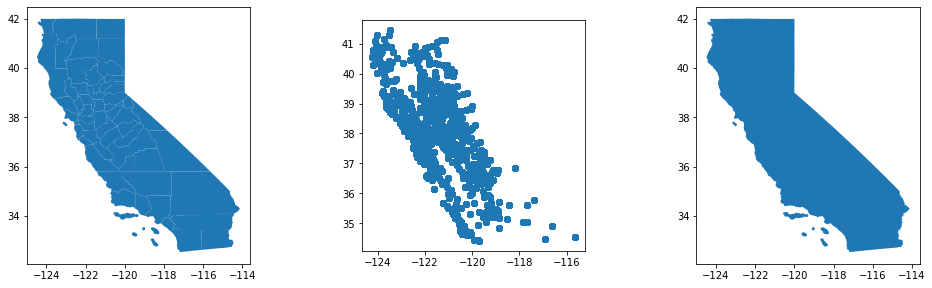

In [ ]:
plt.figure(figsize=(16, 5))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, 0], )
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

counties_wgs84.plot(ax=ax1);
zip_cities_monthly_pge_gdf.plot(ax=ax2);
boundaries_wgs84.plot(ax=ax3);

plt.show()

## Overlaying entire PG&E/NREL with CA Counties

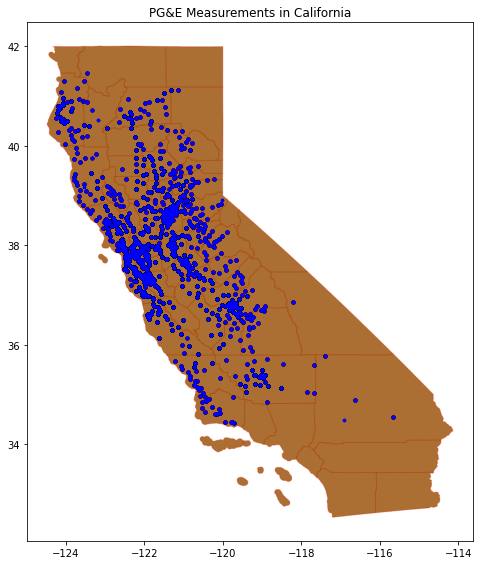

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))



counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

boundaries_wgs84.plot(ax=ax, color='#964B00', alpha=.8)
zip_cities_monthly_pge_gdf.plot(ax=ax, color = 'blue', alpha = 0.5, markersize = 5)
ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('PG&E Measurements in California')

plt.show()

## Overlaying PG&E/NREL in Bay Area Only

Bay Area traditionally consists of [9 counties](https://wikitravel.org/en/Bay_Area_(California)).

<img src='https://wikitravel.org/upload/shared//thumb/b/bc/Bayarea_map.png/900px-Bayarea_map.png' style="width: 300px;">


We will define "Bay Area" as a box that encloses the following coordinates `(lat, long)`:

- South West corner: `(36.897966, -123.433313)`

- North East corner: `(38.593263, -121.381268)`

With these coordinates, we'll need to only consider data in the PG&E/NREL dataset that falls within this region.

In [ ]:
approximate_bay_area_center_lat = 39.5769252
approximate_bay_area_center_long = -122.2833322

## for subsetting the ca counties
bay_area_south_west_lat  = 36.897966    ## vertical
bay_area_south_west_long = -123.433313 ## horizontal
bay_area_north_east_lat  = 38.593263    ## vertical --> closer to north pole => higher values
bay_area_north_east_long = -121.381268 ## horizontal --> west long < east long. west is more negative

## for plotting boundaries
bay_area_limit_south_west_lat  = 36.897966    ## vertical
bay_area_limit_south_west_long = -123.75 ## horizontal
bay_area_limit_north_east_lat  = 38.9    ## vertical --> closer to north pole => higher values
bay_area_limit_north_east_long = -121.2 ## horizontal --> west long < east long. west is more negative


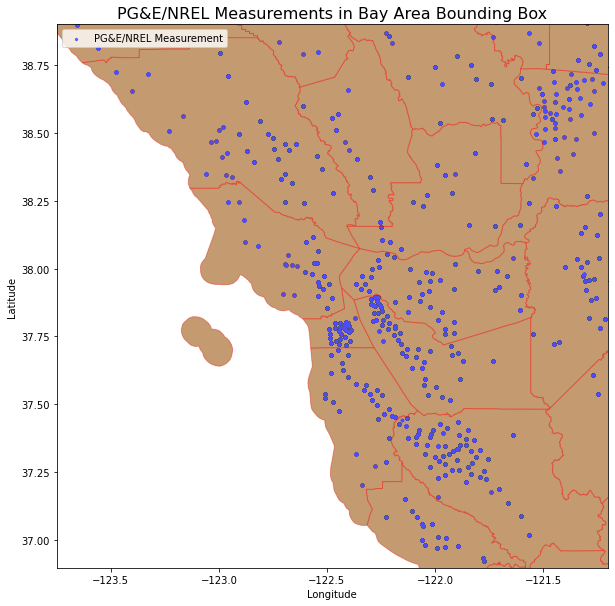

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

boundaries_wgs84.plot(ax=ax, color='#964B00', alpha=.8)

zip_cities_monthly_pge_gdf.plot(ax=ax, color = 'blue', alpha = 0.5, markersize = 5, label='PG&E/NREL Measurement')

counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3, label='County Boundaries')



ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('PG&E/NREL Measurements in Bay Area Bounding Box', size=16)

plt.xlim(bay_area_limit_south_west_long, bay_area_limit_north_east_long)
plt.ylim(bay_area_limit_south_west_lat, bay_area_limit_north_east_lat)
plt.legend()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

#### Boxing the CA Counties Data

In [ ]:
ca_counties.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
## subset south west
bay_area_counties = counties_wgs84[ (bay_area_south_west_long <= counties_wgs84['longitude']) & (bay_area_south_west_lat <= counties_wgs84['latitude']) ]

## subset north east
bay_area_counties = bay_area_counties[ (bay_area_counties['longitude'] <= bay_area_north_east_long) & (bay_area_counties['latitude'] <= bay_area_north_east_lat) ]


In [ ]:
## Viewing which counties were enclosed in our box
print(len(bay_area_counties['NAME']))
bay_area_counties['NAME']

10


6            Sonoma
10    San Francisco
11            Marin
14             Napa
22           Solano
24     Contra Costa
38      Santa Clara
41          Alameda
53        San Mateo
55       Santa Cruz
Name: NAME, dtype: object

#### Boxing the PG&E/NREL Data

In [ ]:
zip_cities_monthly_pge_gdf.columns

Index(['zip', 'city', 'state', 'latitude', 'longitude', 'timezone', 'dst',
       'DATE', 'MONTH', 'YEAR', 'DAY', 'CUSTOMERCL', 'COMBINED',
       'TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'TOTALCUS_std',
       'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std', 'AVERAGETHERM_std',
       'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std', 'Temperature_std',
       'Solar_Zenith_Angle_std', 'geometry'],
      dtype='object')

In [ ]:
## subset south west
bay_area_monthly_pge_nrel = zip_cities_monthly_pge_gdf[ (bay_area_south_west_long <= zip_cities_monthly_pge_gdf['longitude']) & (bay_area_south_west_lat <= zip_cities_monthly_pge_gdf['latitude']) ]

## subst north east
bay_area_monthly_pge_nrel = bay_area_monthly_pge_nrel[ (bay_area_monthly_pge_nrel['longitude'] <= bay_area_north_east_long) & (bay_area_monthly_pge_nrel['latitude'] <= bay_area_north_east_lat) ]


In [ ]:
## Viewing how many measurements are the box
bay_area_monthly_pge_nrel.shape

(56683, 36)

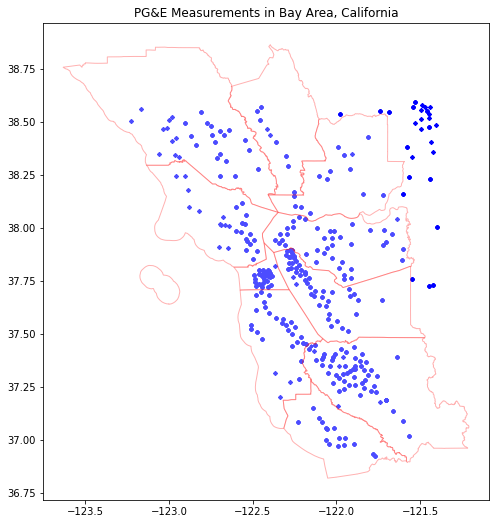

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))

bay_area_monthly_pge_nrel.plot(ax=ax, color = 'blue', alpha = 0.7, markersize = 5)

bay_area_counties.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('PG&E Measurements in Bay Area, California')

plt.show()

In [ ]:
bay_area_monthly_pge_nrel.columns

Index(['zip', 'city', 'state', 'latitude', 'longitude', 'timezone', 'dst',
       'DATE', 'MONTH', 'YEAR', 'DAY', 'CUSTOMERCL', 'COMBINED',
       'TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'TOTALCUS_std',
       'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std', 'AVERAGETHERM_std',
       'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std', 'Temperature_std',
       'Solar_Zenith_Angle_std', 'geometry'],
      dtype='object')

## Heatmaps

In [ ]:
h = bay_area_monthly_pge_nrel
h.columns

measurment_cols = ['TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'TOTALCUS_std',
       'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std', 'AVERAGETHERM_std',
       'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std', 'Temperature_std',
       'Solar_Zenith_Angle_std']

In [ ]:
min(h['Temperature_raw']), max(h['Temperature_raw'])

(2.677419354838709, 27.49529569892475)

In [ ]:
def f(x, measurement):
    year = 2013 + x // 12 # year to filter
    month = x % 12 + 1 # number of month
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12,6))

    min_meas=min(h[measurement])
    max_meas=max(h[measurement])
    
    ax = bay_area_counties.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3);
    ax = h[(h['YEAR']== year) & (h['MONTH']==month)].plot(column=measurement, 
                                                     cmap='coolwarm', 
                                                     legend=True, 
                                                     ax=ax, 
                                                     vmin=min_meas,
                                                     vmax=max_meas);
    
    ax.axis('on') # You can optionally omit the axes

    # Show a title
    ax.set_title('{meas} in Bay Area, California in {m}/{y}'.format(m=month, y=year, meas=measurement))

    return ax
interact(f,
         x=widgets.IntSlider(min=0, max=6*12, step=1, value=36),
         measurement=measurment_cols
        );


interactive(children=(IntSlider(value=36, description='x', max=72), Dropdown(description='measurement', option…

In [ ]:
def f(year, month, measurement):
    fig, ax = plt.subplots(figsize=(8,8))
    
    min_meas=min(h[measurement])
    max_meas=max(h[measurement])
    
    ax = bay_area_counties.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3);
    ax = h[(h['YEAR']== year) & (h['MONTH']==month)].plot(column=measurement, 
                                                     cmap='coolwarm', 
                                                     legend=True, 
                                                     ax=ax, 
                                                     vmin=min_meas,
                                                     vmax=max_meas);
    
    ax.axis('on') # You can optionally omit the axes

    # Show a title
    ax.set_title('{me} in Bay Area, California in {m}/{y}'.format(me=measurement, m=month, y=year))
    
#     html_str = mpld3.fig_to_html(fig)
#     Html_file= open("index.html","w")
#     Html_file.write(html_str)
#     Html_file.close()
    return ax


interact(f,
         year=widgets.IntSlider(min=2013, max=2019, step=1, value=2013),
         month=widgets.IntSlider(min=1, max=12, step=1, value=1),
         measurement=measurment_cols);


interactive(children=(IntSlider(value=2013, description='year', max=2019, min=2013), IntSlider(value=1, descri…

In [ ]:
bay_area_monthly_pge_nrel.columns

Index(['zip', 'city', 'state', 'latitude', 'longitude', 'timezone', 'dst',
       'DATE', 'MONTH', 'YEAR', 'DAY', 'CUSTOMERCL', 'COMBINED',
       'TOTALCUSTO_raw', 'TOTALKWH_raw', 'AVERAGEKWH_raw', 'TOTALTHERM_raw',
       'AVERAGETHERM_raw', 'GHI_raw', 'DHI_raw', 'DNI_raw', 'Wind Speed',
       'Temperature_raw', 'Solar_Zenith_Angle_raw', 'TOTALCUS_std',
       'TOTALKWH_std', 'AVERAGEKWH_std', 'TOTALTHERM_std', 'AVERAGETHERM_std',
       'GHI_std', 'DHI_std', 'DNI_std', 'Wind_Speed_std', 'Temperature_std',
       'Solar_Zenith_Angle_std', 'geometry'],
      dtype='object')

/Library/Python/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


feature  spearman
2           AVERAGEKWH_raw -0.773815
13          AVERAGEKWH_std -0.773815
1             TOTALKWH_raw -0.773815
12            TOTALKWH_std -0.773815
20         Temperature_std -0.186410
16                 GHI_std -0.171452
18                 DNI_std -0.164958
7                  DNI_raw -0.162345
17                 DHI_std -0.128625
6                  DHI_raw -0.126494
8               Wind Speed -0.093150
19          Wind_Speed_std -0.093150
5                  GHI_raw -0.074117
9          Temperature_raw -0.066312
0           TOTALCUSTO_raw  0.059369
11            TOTALCUS_std  0.059369
10  Solar_Zenith_Angle_raw  0.170180
21  Solar_Zenith_Angle_std  0.170180
14          TOTALTHERM_std  0.938490
3           TOTALTHERM_raw  0.938490
4         AVERAGETHERM_raw  1.000000
15        AVERAGETHERM_std  1.000000

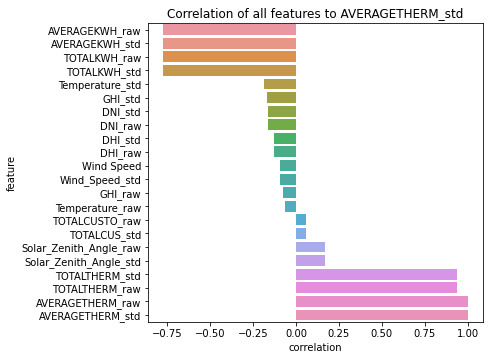

In [ ]:
corr_vis(bay_area_monthly_pge_nrel, measurment_cols, meas='AVERAGETHERM_std')

In [ ]:
def f(x, measurement):
    year = 2013 + x // 12 # year to filter
    month = x % 12 + 1 # number of month
    fig, ax = plt.subplots(figsize=(12,6))

    min_meas=min(h[measurement])
    max_meas=max(h[measurement])
    
    ax = bay_area_counties.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3);
    ax = h[(h['YEAR']== year) & (h['MONTH']==month)].plot(column=measurement, 
                                                     cmap='inferno', 
                                                     legend=True, 
                                                     ax=ax, 
                                                     vmin=min_meas,
                                                     vmax=max_meas);
    
    ax.axis('on') # You can optionally omit the axes

    # Show a title
    ax.set_title('PG&E Measurements in Bay Area, California in {m}/{y}'.format(m=month, y=year))

    return ax
interact(f,
         x=widgets.IntSlider(min=0, max=6*12, step=1, value=36),
         measurement=measurment_cols,
         shaded_measurment=measurment_cols
        );


In [ ]:
h

zip       city state   latitude  longitude timezone dst        DATE  \
94      94564     Pinole    CA  37.997509 -122.29208       -8   1  2013-01-01   
95      94564     Pinole    CA  37.997509 -122.29208       -8   1  2013-02-01   
96      94564     Pinole    CA  37.997509 -122.29208       -8   1  2013-03-01   
97      94564     Pinole    CA  37.997509 -122.29208       -8   1  2013-01-01   
98      94564     Pinole    CA  37.997509 -122.29208       -8   1  2013-02-01   
...       ...        ...   ...        ...        ...      ...  ..         ...   
136869  95757  Elk Grove    CA  38.359200 -121.42280       -8   1  2019-08-01   
136870  95757  Elk Grove    CA  38.359200 -121.42280       -8   1  2019-09-01   
136871  95757  Elk Grove    CA  38.359200 -121.42280       -8   1  2019-10-01   
136872  95757  Elk Grove    CA  38.359200 -121.42280       -8   1  2019-11-01   
136873  95757  Elk Grove    CA  38.359200 -121.42280       -8   1  2019-12-01   

        MONTH  YEAR  ...  AVERAGEKWH_std TOTALTHERM_std AVERAGETHERM_std  \
94          1  2013  ...        0.434919      -0.461560        -0.348278   
95          2  2013  ...        0.245494      -0.461560        -0.348278   
96          3  2013  ...        0.247315      -0.461560        -0.348278   
97          1  2013  ...       -0.590525       2.102233         1.653170   
98          2  2013  ...       -0.590525       1.308028         1.037340   
...       ...   ...  ...             ...            ...              ...   
136869      8  2019  ...       -0.590525       0.514064        -0.018369   
136870      9  2019  ...       -0.590525       0.691558         0.025619   
136871     10  2019  ...       -0.590525       1.035228         0.157582   
136872     11  2019  ...       -0.590525       2.357266         0.575467   
136873     12  2019  ...       -0.590525       4.385852         1.257279   

         GHI_std   DHI_std   DNI_std  Wind_Speed_std  Temperature_std  \
94     -1.104314 -1.395587 -0.577344        0.229490        -1.408347   
95     -0.578528 -0.869444 -0.114522        0.211040        -1.108450   
96     -0.258319  0.869032 -0.712522        0.102642        -0.736089   
97     -1.104314 -1.395587 -0.577344        0.229490        -1.408347   
98     -0.578528 -0.869444 -0.114522        0.211040        -1.108450   
...          ...       ...       ...             ...              ...   
136869  1.121753 -0.117727  1.416961        0.449618         1.731593   
136870  0.400474 -0.276156  0.782958        0.106682         1.250658   
136871 -0.211164 -0.770150  0.352313       -0.220288         0.511782   
136872 -0.967100 -1.089058 -0.575312       -0.483662        -0.211151   
136873 -1.556962 -1.188350 -1.775173        0.254989        -0.955595   

       Solar_Zenith_Angle_std                     geometry  
94                   1.263679  POINT (-122.29208 37.99751)  
95                   0.776013  POINT (-122.29208 37.99751)  
96                   0.088214  POINT (-122.29208 37.99751)  
97                   1.263679  POINT (-122.29208 37.99751)  
98                   0.776013  POINT (-122.29208 37.99751)  
...                       ...                          ...  
136869              -0.848208  POINT (-121.42280 38.35920)  
136870              -0.171277  POINT (-121.42280 38.35920)  
136871               0.556067  POINT (-121.42280 38.35920)  
136872               1.145378  POINT (-121.42280 38.35920)  
136873               1.414926  POINT (-121.42280 38.35920)  

[56683 rows x 36 columns]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2f0e727-e6a4-4b2a-b180-a91c3a609ecf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>